<a href="https://colab.research.google.com/github/aguillen06/Ignitera-GTM-Command-Center-by-Symtri/blob/main/Learner_Notebook_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.
    * Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

## **Installing and Importing the necessary libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install numpy==1.26.4 \
             scikit-learn==1.6.1 \
             scipy==1.13.1 \
             gensim==4.3.3 \
             sentence-transformers==3.4.1 \
             pandas==2.2.2

Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To build, tune, and evaluate ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# Import TensorFlow and Keras for deep learning model building.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [16]:
# uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Complete the code to read the CSV file.
stock_news = pd.read_csv("/content/stock_news.csv")

### **Listing files in Google Drive to find `stock_news.csv`**

Run the following code cell to list the contents of your Google Drive. Look for `stock_news.csv` and note its full path.

In [19]:
import os

# Path to your Google Drive root
drive_path = '/content/drive/MyDrive'

print(f"Contents of {drive_path}:")

# Recursively list contents of MyDrive
for root, dirs, files in os.walk(drive_path):
    # Limit depth to avoid listing too many files if Drive is very large
    if root.count(os.sep) - drive_path.count(os.sep) < 2: # Adjust depth as needed
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name) + '/')
    else:
        # Skip deeper directories once depth limit is reached
        dirs[:] = [] # Clear dirs to prevent os.walk from going deeper

Contents of /content/drive/MyDrive:
/content/drive/MyDrive/resume resp.docx
/content/drive/MyDrive/Action memo20150312_134438_1.jpg
/content/drive/MyDrive/Action memo20150217_123458_1.jpg
/content/drive/MyDrive/Action memo20150202_190005_1.jpg
/content/drive/MyDrive/Action memo20150202_191424_1.jpg
/content/drive/MyDrive/Ron (2).JPG
/content/drive/MyDrive/Ron.JPG
/content/drive/MyDrive/Action memo20150624_081631_1.jpg
/content/drive/MyDrive/Action memo20150524_165801_1.jpg
/content/drive/MyDrive/Action memo20150516_122921_1.jpg
/content/drive/MyDrive/Action memo20150619_170021_1.jpg
/content/drive/MyDrive/Action memo20150518_070751_1.jpg
/content/drive/MyDrive/Action memo20150509_175301_1.jpg
/content/drive/MyDrive/Action memo20150511_133439_1.jpg
/content/drive/MyDrive/Action memo20150427_141350_1.jpg
/content/drive/MyDrive/Action memo20150202_190005_1(2).jpg
/content/drive/MyDrive/Action memo20150312_134438_1(2).jpg
/content/drive/MyDrive/Action memo20150217_123458_1(2).jpg
/content/

In [20]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

#### **Displaying the first few rows of the dataset**

In [21]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,01-02-2019,The dollar minutes ago tumbled to 106 67 from...,38.72,39.71,38.56,39.48,130672400,1
1,01-02-2019,By Wayne Cole and Swati Pandey SYDNEY Reuters...,38.72,39.71,38.56,39.48,130672400,-1
2,01-02-2019,By Stephen Culp NEW YORK Reuters Wall Stre...,38.72,39.71,38.56,39.48,130672400,0
3,01-02-2019,By Wayne Cole SYDNEY Reuters The Australia...,38.72,39.71,38.56,39.48,130672400,-1
4,01-02-2019,Investing com Asian equities fell in morning...,38.72,39.71,38.56,39.48,130672400,1


#### **Understanding the shape of the dataset**

In [22]:
stock.shape

(418, 8)

#### **Checking the data types of the columns**

In [23]:
stock.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [24]:
# Convert the 'Date' column in the 'stocks' DataFrame to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

#### **Checking the statistical summary**

In [25]:
stock.describe()

,Date,Open,High,Low,Close,Volume,Label
count,418,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000
mean,2019-02-14 12:24:06.889952256,42.308852,42.787321,41.923732,42.418517,1.294225e+08,0.308612
min,2019-01-02 00:00:00,35.990000,36.430000,35.500000,35.550000,4.544800e+07,-1.000000
25%,2019-01-11 00:00:00,38.130000,38.420000,37.720000,38.270000,1.029072e+08,-1.000000
50%,2019-01-31 00:00:00,41.530000,42.250000,41.140000,41.610000,1.156272e+08,1.000000
75%,2019-03-21 00:00:00,47.190000,47.427500,46.480000,47.032500,1.511252e+08,1.000000
max,2019-04-29 00:00:00,51.840000,52.120000,51.760000,51.870000,3.652488e+08,1.000000
std,NaN,4.947134,4.947413,4.967880,4.999867,4.574550e+07,0.943473


#### **Checking the duplicate values**

In [26]:
stock.duplicated().sum()

0

#### **Checking for missing values**

In [27]:
stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Countplot on Label**

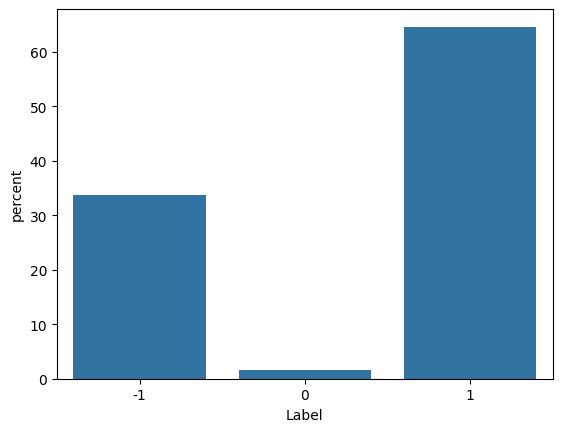

In [28]:
sns.countplot(data=stock, x='Label', stat="percent");

#### **Density Plot of Price (Open, High, Low, Close)**

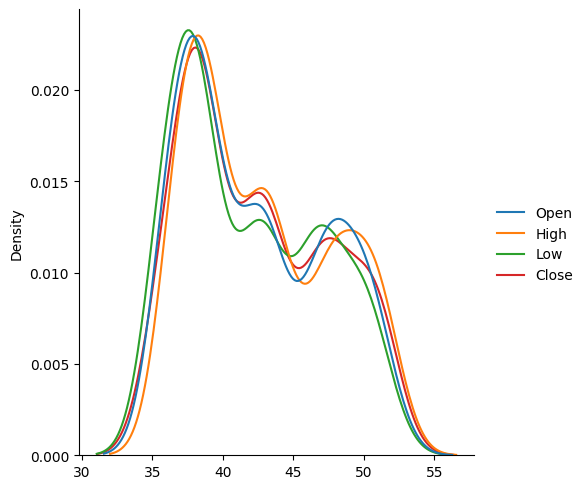

In [29]:
# Plot KDE for the 'Open', 'High', 'Low', 'Close' columns of the 'stock' DataFrame.
sns.displot(data=stock[['Open','High','Low','Close']], kind='kde', palette="tab10");  # Create a KDE plot with a color palette.

#### **Histogram on Volume**

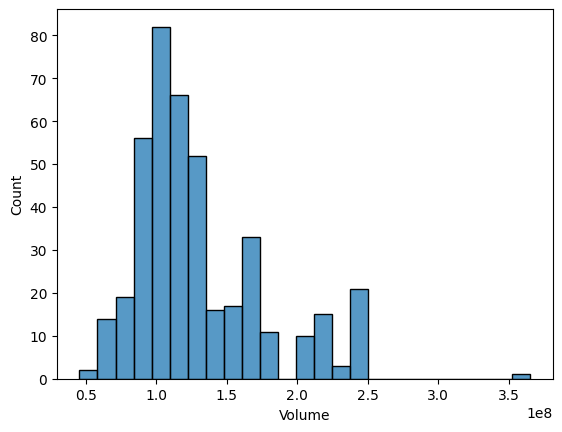

In [30]:
sns.histplot(stock, x='Volume');

#### **Histogram and statistical summary on News Length**

In [31]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

stock['news_len'].describe()

,news_len
count,418.000000
mean,525.662679
std,303.584080
min,44.000000
25%,304.250000
50%,480.000000
75%,700.500000
max,2142.000000


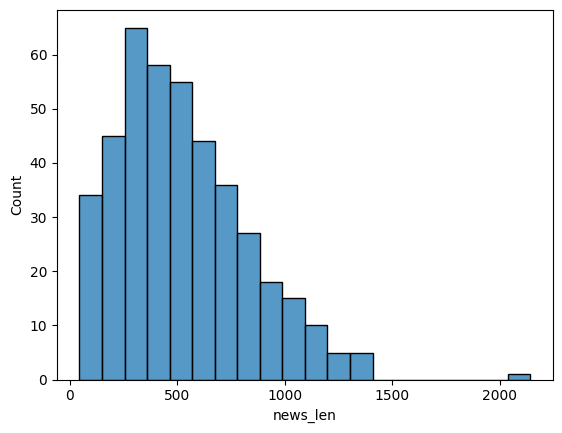

In [32]:
sns.histplot(data=stock, x="news_len");

### **Bivariate Analysis**

#### **Correlation**

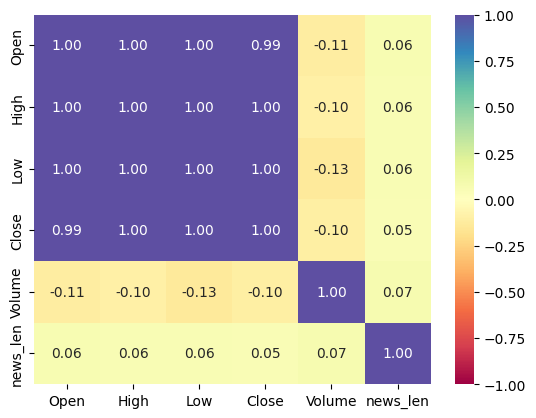

In [33]:
cols = ['Open','High','Low','Close','Volume','news_len']
sns.heatmap(
    stock[cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### **Label vs Price (Open, High, Low, Close)**

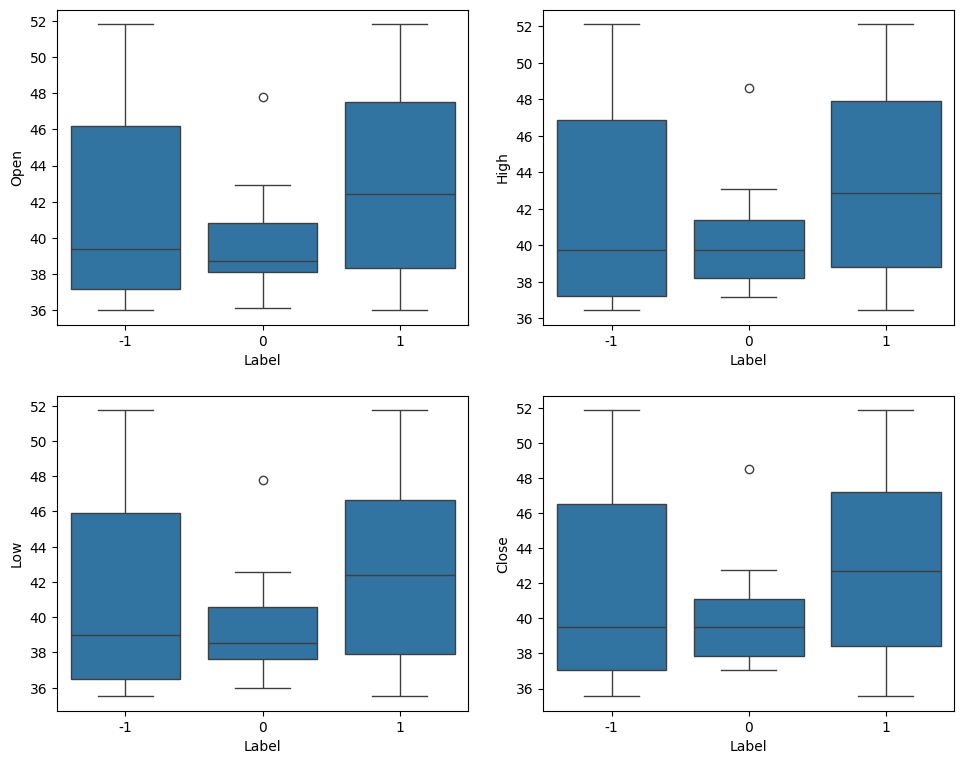

In [34]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### **Label vs Volume**

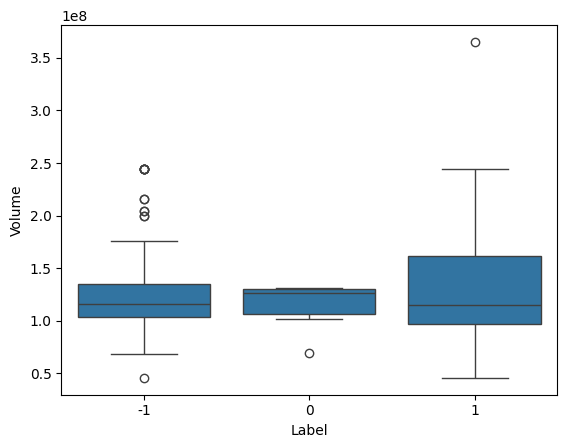

In [35]:
sns.boxplot(
    data=stock, x="Label", y="Volume"
);

#### **Date vs Price (Open, High, Low, Close)**

- The data is at the level of news, and we might have more than one news in a day. However, the prices are at daily level
- So, we can aggregate the data at a daily level by taking the mean of the attributes

In [36]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,38.72,39.71,38.56,39.48,130672400.0
2019-01-03,35.99,36.43,35.50,35.55,103544800.0
2019-01-04,36.13,37.14,35.95,37.06,111448000.0
2019-01-07,37.17,37.21,36.47,36.98,109012000.0
2019-01-08,37.39,37.96,37.13,37.69,216071600.0


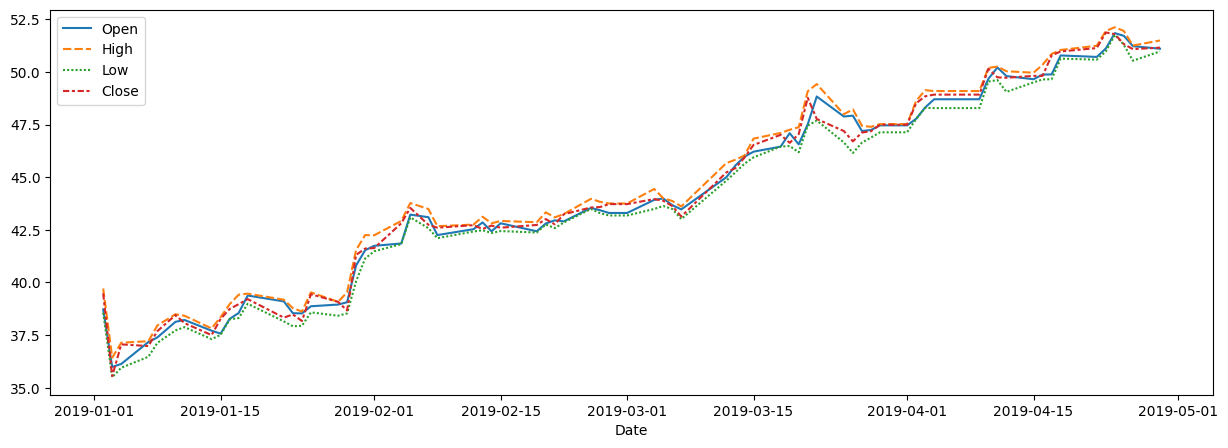

In [37]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

#### **Volume vs Close Price**

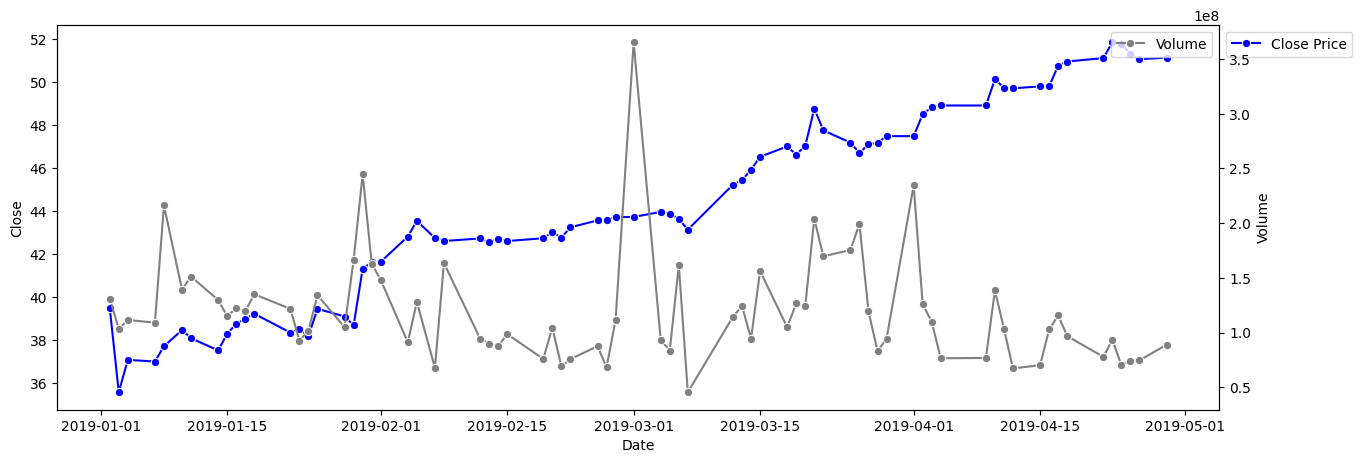

In [38]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [39]:
stock['Date'].describe()

,Date
count,418
mean,2019-02-14 12:24:06.889952256
min,2019-01-02 00:00:00
25%,2019-01-11 00:00:00
50%,2019-01-31 00:00:00
75%,2019-03-21 00:00:00
max,2019-04-29 00:00:00


### Train-test Split

In [40]:
# Select training data: choose all rows where the 'Date' is before a specific date of your choice.
# Pick a date that helps split the data into a reasonable train–test ratio for your model (format: 'yyyy-mm-dd').
X_train = stock[stock['Date'] < '2019-04-01'].reset_index()

# Select testing data: choose all rows where the 'Date' is before a specific date of your choice.
# Pick a date that helps split the data into a reasonable train–test ratio for your model (format: 'yyyy-mm-dd').
X_test = stock[stock['Date'] >= '2019-04-01'].reset_index()

In [41]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_test = X_test["Label"].copy()

In [42]:
print("Train data shape",X_train.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Test label shape ",y_test.shape)

Train data shape (347, 10)
Test data shape  (71, 10)
Train label shape (347,)
Test label shape  (71,)


## **Word Embeddings**

### **Generating Text Embeddings using Word2Vec**

#### **Defining the model**

In [43]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [44]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [45]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 14577


#### **Encoding the datasets**

In [46]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

#### **Averaging the word vectors to get sentence encodings**

In [47]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [48]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  7.790114164352417


In [49]:
print(X_train_wv.shape, X_test_wv.shape)

(347, 300) (71, 300)


### **Generating Text Embeddings using Sentence Transformer**

#### **Defining the model**

In [50]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### **Encoding the dataset**

In [51]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device="cpu")
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device="cpu")

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Time taken  53.96628451347351


In [52]:
print(X_train_st.shape, X_test_st.shape)

(347, 384) (71, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### **Model Evaluation Criterion**

##### **Defining Utility Functions**

In [55]:
def plot_confusion_matrix(actual, predicted):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """

    # Compute the confusion matrix.
    cm = confusion_matrix(actual, predicted)

    # Create a new figure with a specified size
    plt.figure(figsize=(5, 4))

    # Define the labels for the confusion matrix dynamically from the data
    label_list = sorted(list(np.unique(np.concatenate((actual, predicted)))))

    # Plot the confusion matrix using a heatmap with annotations
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)

    # Label for the y-axis
    plt.ylabel('Actual')

    # Label for the x-axis
    plt.xlabel('Predicted')

    # Title of the plot
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

In [56]:
def model_performance_classification_sklearn(actual, predicted):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """

    # Compute Accuracy
    acc = accuracy_score(actual,predicted)
    # Compute Recall
    recall = recall_score(actual,predicted,average='weighted')
    # Compute Precision
    precision = precision_score(actual,predicted,average='weighted')
    # Compute F1-score
    f1 = f1_score(actual,predicted,average='weighted')

    # Create a DataFrame to store the computed metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )
    # Return the DataFrame with the metrics
    return df_perf

### **Building Random Forest Models using different text embeddings**

#### **Building a Random Forest Model using text embeddings obtained from the Word2Vec**

In [57]:
# Build the Random Forest model
# Fill in suitable values for:
# - n_estimators: the number of trees in the forest (e.g., 100, 200)
# - max_depth: maximum depth of each tree (e.g., 10, 20, or None for full depth)
rf_word2vec = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on the training data
rf_word2vec.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### **Checking Training and Test Performance**


In [58]:
# Predicting on train data
y_pred_train = rf_word2vec.predict(X_train_wv)

# Predicting on test data
y_pred_test = rf_word2vec.predict(X_test_wv)

**Confusion Matrix**

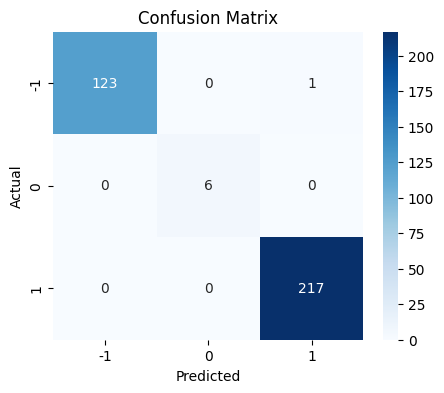

In [59]:
plot_confusion_matrix(y_train,y_pred_train)

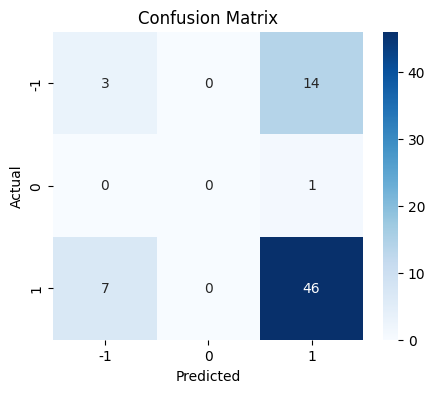

In [60]:
plot_confusion_matrix(y_test,y_pred_test)

**Classification Report**

In [61]:
#Calculating different metrics on training data
rf_train_wv = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997118  0.997118   0.997131  0.997116


In [62]:
#Calculating different metrics on test data
rf_test_wv = model_performance_classification_sklearn(y_test, y_pred_test)
print("Test performance:\n",rf_test_wv)

Test performance:
    Accuracy    Recall  Precision       F1
0  0.690141  0.690141   0.634749  0.65563


#### **Building a Random Forest Model using text embeddings obtained from the Sentence Transformer**

In [63]:
# Building the model
# Fill in suitable values for:
# - n_estimators: the number of trees in the forest (e.g., 100, 200)
# - max_depth: maximum depth of each tree (e.g., 10, 20, or None for full depth)
rf_st = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


# Fitting on train data
rf_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

#### **Checking Training and Test Performance**

In [64]:
# Predicting on train data
y_pred_train = rf_st.predict(X_train_st)

# Predicting on test data
y_pred_test = rf_st.predict(X_test_st)

**Confusion Matrix**

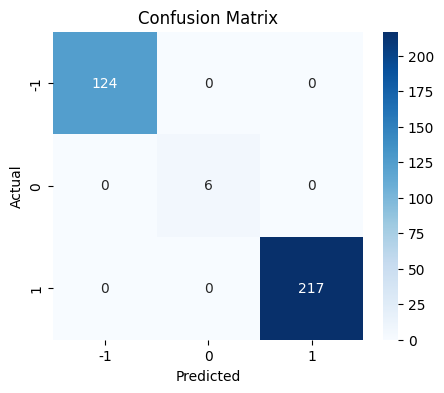

In [65]:
plot_confusion_matrix(y_train, y_pred_train)

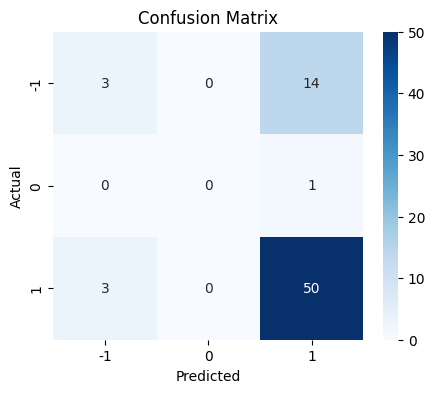

In [66]:
plot_confusion_matrix(y_test, y_pred_test)

**Classification Report**

In [67]:
#Calculating different metrics on training data
rf_train_st = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [68]:
#Calculating different metrics on test data
rf_test_st = model_performance_classification_sklearn(y_test, y_pred_test)
print("Test performance:\n",rf_test_st)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.746479  0.746479   0.693933  0.695071


### **Building Neural Network Models using different text embeddings**

#### **Building a Neural Network Model using text embeddings obtained from the Word2Vec**

In [69]:
# Convert the labels
label_mapping = {1: 2, -1: 0, 0: 1}
y_train_mapped_wv = [label_mapping[label] for label in y_train]
y_test_mapped_wv = [label_mapping[label] for label in y_test]

# Convert your features DataFrame to a NumPy array
X_train_wv_np = np.array(X_train_wv)
X_test_wv_np = np.array(X_test_wv)
y_train_mapped_wv = np.array(y_train_mapped_wv)
y_test_mapped_wv = np.array(y_test_mapped_wv)

In [70]:
import gc

# Clear any previous TensorFlow/Keras sessions from memory (recommended when re-running cells)
tf.keras.backend.clear_session()
gc.collect()

# Define the model architecture
model = Sequential()

# Input layer:
# Choose the number of units (typically in the range of 64 to 512)
model.add(Dense(128, activation='relu', input_shape=(X_train_wv_np.shape[1],)))

# Dropout layer:
# Choose a dropout rate between 0.2 and 0.5 to reduce overfitting
model.add(Dropout(0.3))

# Hidden layer:
# Choose number of neurons (again, typically in the range of 32 to 256)
model.add(Dense(64, activation='relu'))

# Output layer:
model.add(Dense(3, activation='softmax'))

# Compile the model
# Fill in:
# - optimizer: choose from options like 'adam', 'sgd', or 'rmsprop'

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,979 (183.51 KB)

 Trainable params: 46,979 (183.51 KB)

 Non-trainable params: 0 (0.00 B)

**Note:**
- During training, we use accuracy as a metric to monitor how well the model is learning to distinguish between classes in each batch.
- Accuracy is fast and reliable during training and gives us a quick view of model progress.
- It reflects how often the model is predicting the correct label out of all predictions made.



In [71]:
# Fit the model on training data
# Fill in appropriate values for:
# - epochs: number of times the model will see the entire training data (typically 5 to 50)
# - batch_size: number of samples the model will process before updating weights (commonly 16 to 128)

history = model.fit(
    X_train_wv_np, y_train_mapped_wv,
    epochs=20,
    batch_size=32
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3295 - loss: 1.1161
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6488 - loss: 0.7762 
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5661 - loss: 0.7585 
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 0.7698 
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6069 - loss: 0.7196 
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6028 - loss: 0.7544 
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.7397 
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5914 - loss: 0.7560 
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.7497 
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 0.7118 
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5943 - loss: 0.7519 
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0

#### **Checking Training and Test Performance**

In [72]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_wv_np)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [73]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_wv_np)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [77]:
# Re-predict class probabilities on training data for Word2Vec NN to ensure correct values
y_train_pred_probs_nn_wv = model.predict(X_train_wv_np)
y_train_preds_nn_wv = tf.argmax(y_train_pred_probs_nn_wv, axis=1).numpy()

# Re-predict class probabilities on test data for Word2Vec NN to ensure correct values
y_test_pred_probs_nn_wv = model.predict(X_test_wv_np)
y_test_preds_nn_wv = tf.argmax(y_test_pred_probs_nn_wv, axis=1).numpy()

# Convert back to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds_nn_wv])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds_nn_wv])

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


**Confusion Matrix**

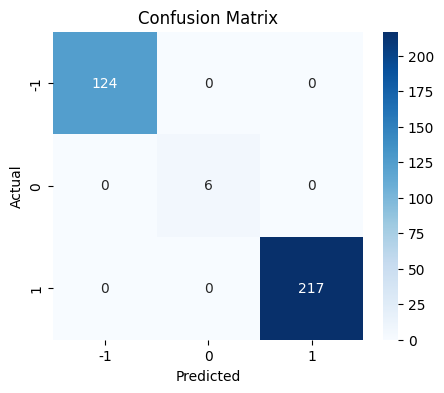

In [78]:
plot_confusion_matrix(y_train, y_pred_train)

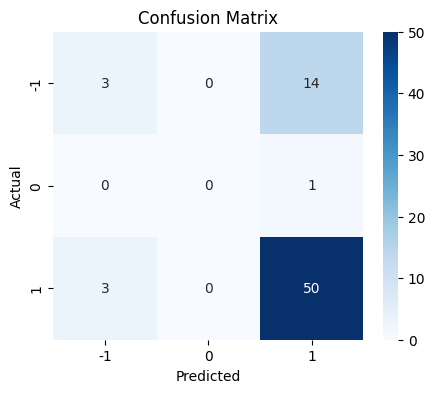

In [79]:
plot_confusion_matrix(y_test, y_pred_test)

**Classification Report**

In [80]:
#Calculating different metrics on training data
NN_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", NN_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.636888  0.636888   0.647257  0.520465


In [81]:
#Calculating different metrics on test data
NN_test_wv = model_performance_classification_sklearn(y_test, y_test_preds)
print("Test performance:\n",NN_test_wv)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.746479  0.746479   0.682282  0.661547


#### **Building a Neural Network Model using text embeddings obtained from the Sentence Transformer**

In [82]:
# Convert the labels
label_mapping = {1: 2, -1: 0, 0: 1}
y_train_mapped_st = [label_mapping[label] for label in y_train]
y_test_mapped_st = [label_mapping[label] for label in y_test]

# Convert your features DataFrame to a NumPy array
X_train_st_np = np.array(X_train_st)
X_test_st_np = np.array(X_test_st)
y_train_mapped_st = np.array(y_train_mapped_st)
y_test_mapped_st = np.array(y_test_mapped_st)

In [83]:
import gc

# Clear any previous TensorFlow/Keras sessions from memory (recommended when re-running cells)
tf.keras.backend.clear_session()
gc.collect()

# Define the model architecture
model = Sequential()

# Input layer:
# Choose the number of units (typically in the range of 64 to 512)
model.add(Dense(128, activation='relu', input_shape=(X_train_st.shape[1],)))

# Dropout layer:
# Choose a dropout rate between 0.2 and 0.5 to reduce overfitting
model.add(Dropout(0.3))

# Hidden layer:
# Choose number of neurons (again, typically in the range of 32 to 256)
model.add(Dense(64, activation='relu'))

# Output layer:
# 3 output classes → use softmax for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
# Fill in:
# - optimizer: choose from options like 'adam', 'sgd', or 'rmsprop'
# - loss: use 'sparse_categorical_crossentropy' for integer-encoded labels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,731 (225.51 KB)

 Trainable params: 57,731 (225.51 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Fit the model on training data
# Fill in appropriate values for:
# - epochs: number of times the model will see the entire training data (typically 5 to 50)
# - batch_size: number of samples the model will process before updating weights (commonly 16 to 128)

history = model.fit(
    X_train_st_np, y_train_mapped_st,
    epochs=20,
    batch_size=32
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4717 - loss: 1.0568
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6110 - loss: 0.8554 
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5999 - loss: 0.7556 
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5929 - loss: 0.7053 
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6497 - loss: 0.6934 
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 0.6561 
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7738 - loss: 0.5640 
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7877 - loss: 0.5174 
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.5278 
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.5061 
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.4719 
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

#### **Checking Training and Test Performance**

In [85]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_st_np)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [86]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_st_np)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [87]:
# Convert back to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

**Confusion Matrix**

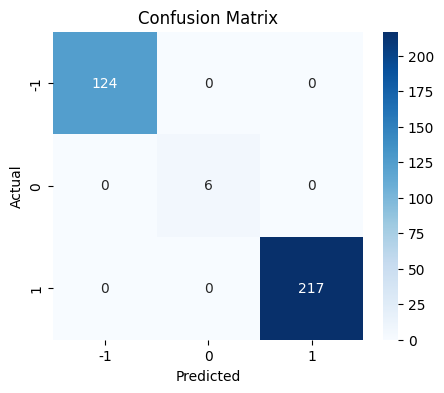

In [88]:
plot_confusion_matrix(y_train, y_pred_train)

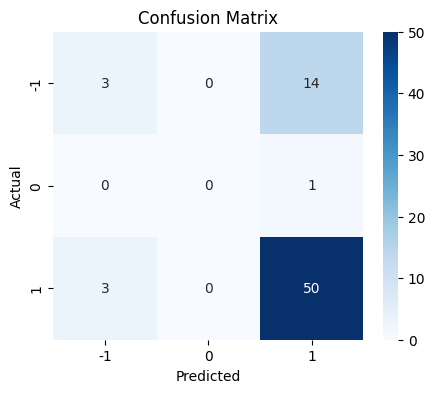

In [89]:
plot_confusion_matrix(y_test, y_pred_test)

**Classification Report**

In [90]:
#Calculating different metrics on training data
NN_train_st = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", NN_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.936599  0.936599   0.926277  0.929443


In [91]:
#Calculating different metrics on test data
NN_test_st = model_performance_classification_sklearn(y_test, y_test_preds)
print("Test performance:\n",NN_test_st)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.774648  0.774648   0.793644  0.779278


### **Model Performance Summary and Final Model Selection**

In [92]:
# Concatenate the training performance metrics from different models into a single DataFrame
models_train_comp_df = pd.concat(
    [
        rf_train_wv.T,  # Random Forest using Word2Vec embeddings
        NN_train_wv.T,  # Neural Network using Word2Vec embeddings
        rf_train_st.T,  # Random Forest using Sentence Transformer embeddings
        NN_train_st.T   # Neural Network using Sentence Transformer embeddings
    ],
    axis=1  # Concatenate along columns (i.e., each model's metrics form one column)
)

# Assigning meaningful column names for each model for clarity in the output DataFrame
models_train_comp_df.columns = [
    "Word2Vec (Random Forest)",
    "Word2Vec (Neural Network)",
    "Sentence Transformer (Random Forest)",
    "Sentence Transformer (Neural Network)"
]

# Print the training performance comparison table
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Word2Vec (Random Forest),Word2Vec (Neural Network),Sentence Transformer (Random Forest),Sentence Transformer (Neural Network)
Accuracy,0.997118,0.636888,1.0,0.936599
Recall,0.997118,0.636888,1.0,0.936599
Precision,0.997131,0.647257,1.0,0.926277
F1,0.997116,0.520465,1.0,0.929443


In [94]:
# Concatenate the testing performance metrics from different models into a single DataFrame
models_test_comp_df = pd.concat(
    [
        rf_test_wv.T,  # Random Forest using Word2Vec embeddings
        NN_test_wv.T,  # Neural Network using Word2Vec embeddings
        rf_test_st.T,  # Random Forest using Sentence Transformer embeddings
        NN_test_st.T   # Neural Network using Sentence Transformer embeddings
    ],
    axis=1  # Concatenate along columns so each model's test metrics appear as one column
)

# Set descriptive column names for clarity in the resulting comparison table
models_test_comp_df.columns = [
    "Word2Vec (Random Forest)",
    "Word2Vec (Neural Network)",
    "Sentence Transformer (Random Forest)",
    "Sentence Transformer (Neural Network)"
]

# Print the testing performance comparison table
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Word2Vec (Random Forest),Word2Vec (Neural Network),Sentence Transformer (Random Forest),Sentence Transformer (Neural Network)
Accuracy,0.690141,0.746479,0.746479,0.774648
Recall,0.690141,0.746479,0.746479,0.774648
Precision,0.634749,0.682282,0.693933,0.793644
F1,0.655630,0.661547,0.695071,0.779278


#### **Model Performance Summary:**

## **Conclusions and Recommendations**

<font size=6 color='blue'>Power Ahead</font>
___